In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import ast

In [2]:
import warnings
warnings.simplefilter("ignore")
pd.set_option("display.max_columns", None)
#pd.options.display.max_colwidth = 1000

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка датасета, экспериментально была определена кодировка "cp1251"

In [4]:
data = pd.read_csv('/content/drive/MyDrive/cv_programmers_1.csv', encoding = 'cp1251')
data.head()

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,NaN,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,6100000100000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-30T10:50:53+0300,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,NaN,NaN,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,NaN,c60a1390-249e-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,NaN,Программист,2021-11-01T20:56:17+0300,2021-11-28T19:12:25+0300,7800000000000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-28T19:18:18+0300,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,70f11d60-3b38-11ec-a077-7bf9d8e248ac,NaN,Готов-к-переобучению,NaN,048b3b20-8e30-11eb-9809-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,NaN,Программист,2022-07-28T10:00:49+0300,2022-07-29T10:30:56+0300,5600000200000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2022-07-29T14:04:11+0300,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,NaN,NaN,Удаленная,Не-готов-к-командировкам,6fef4e90-028a-11ed-8c5e-add87b92f9ec,NaN,Готов-к-переобучению,NaN,dbeca090-18c5-11e5-b612-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"
3,415,02ec5b90-658a-11ed-8193-e57b87a63fa7,UNKNOWN,False,NOT_APPLICABLE,1600000000000,NaN,Программист,2022-11-16T11:38:14+0300,2022-11-16T11:38:14+0300,1600000100000,NaN,NaN,[],RU,NOT_APPLICABLE,NaN,2022-11-17T09:21:38+0300,Полный-рабочий-день,0,39157,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,908502f0-7e12-11ec-b77d-956717074877,NaN,Готов-к-переобучению,NaN,2f73dc30-23f5-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,53,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Республика-Т

Размер датаесета - всего 425 записей. Это сразу дает понять, что обучить какую-либо серьезную модель машинного обучения невозможно - данных слишком мало

In [5]:
data.shape

(425, 48)

Посмотрим на типы данных

In [6]:
data.dtypes

Unnamed: 0                         int64
id                                object
abilympics_inspection_status      object
abilympics_participation            bool
worldskills_inspection_status     object
state_region_code                  int64
regionNameTerm                   float64
position_name                     object
date_create                       object
date_modify                       object
home_city_code                     int64
education                         object
academic_degree                  float64
drive_license                     object
code_country                      object
nark_inspection_status            object
nark_certificate                  object
published_date                    object
schedule_type                     object
experience                         int64
salary                             int64
professional_skills               object
add_skills                        object
busy_type                         object
business_trip   

Количество пропущенных значений. Удалим параметры, которые имеют про пуски во всех записях, т.к. они не несут никакой информации. Это параметры regionNameTerm, academic_degree, code_external_system. Есть и другие параметры с достаточно большим количеством пропусков, но судя по датасету это или вплоне логично (nark_sertificate), или это параметры, которые запоняют малое количество пользователей, но они все еще могут нести полезную информацию.

In [7]:
data.isna().sum()

Unnamed: 0                         0
id                                 0
abilympics_inspection_status       0
abilympics_participation           0
worldskills_inspection_status      0
state_region_code                  0
regionNameTerm                   425
position_name                      0
date_create                        0
date_modify                        0
home_city_code                     0
education                         58
academic_degree                  425
drive_license                      0
code_country                       0
nark_inspection_status             0
nark_certificate                 420
published_date                     4
schedule_type                      0
experience                         0
salary                             0
professional_skills              397
add_skills                       405
busy_type                          0
business_trip                      0
id_candidate                       0
other_certificates               388
r

In [8]:
data.drop(columns = ['regionNameTerm', 'academic_degree', 'code_external_system'], inplace = True)

Посмотрим на распределения числовых параметров. Можно отметить, что в датасете нет аномалий - отрицательных зарплат и т.п.

In [9]:
data.describe()

,Unnamed: 0,state_region_code,home_city_code,experience,salary,publication_period,fullness_rate
count,425.000000,4.250000e+02,4.250000e+02,425.000000,425.000000,425.0,425.000000
mean,50536.628235,4.487059e+12,4.487466e+12,3.296471,46426.835294,0.0,66.891765
std,30153.699489,2.501754e+12,2.501793e+12,6.191642,40432.473215,0.0,14.335684
min,44.000000,1.000000e+11,1.000002e+11,0.000000,0.000000,0.0,0.000000
25%,24301.000000,2.300000e+12,2.300000e+12,0.000000,25000.000000,0.0,61.000000
50%,49942.000000,5.000000e+12,5.000003e+12,1.000000,40000.000000,0.0,67.000000
75%,76992.000000,6.600000e+12,6.600001e+12,4.000000,50000.000000,0.0,75.000000
max,99955.000000,9.100000e+12,9.101200e+12,52.000000,350000.000000,0.0,100.000000


Параметр professionList содержит информацию о сфере деятельности работника. Эта информация кажется важной и для более удоной обработки я решил разбить словарь на отдельные столбцы

In [10]:
data['professionList']

0      [{"code_profession": "270999", "code_professio...
1      [{"code_profession": "258573", "code_professio...
2      [{"code_profession": "258573", "code_professio...
3      [{"code_profession": "258573", "code_professio...
4      [{"code_profession": "149959", "code_professio...
                             ...                        
420    [{"code_professional_sphere": "InformationTech...
421    [{"code_profession": "258573", "code_professio...
422    [{"code_professional_sphere": "NotQualificatio...
423    [{"code_profession": "258573", "code_professio...
424    [{"code_profession": "258573", "code_professio...
Name: professionList, Length: 425, dtype: object

In [11]:
data_2 = data.copy(deep = True)
data_2['professionList'] = data['professionList'].apply(lambda x: x[1:-1])
data_2['professionList'] = data_2['professionList'].apply(lambda x: ast.literal_eval(x))
data_2 = pd.concat([data_2.drop(['professionList'], axis=1), data_2['professionList'].apply(pd.Series)], axis=1)

Теперь код професии и и сфера деятельности удобно записаны в виде отдельного параметра

In [12]:
data_2.head()

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,deleted,fullness_rate,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName,code_profession,code_professional_sphere,owner_id,type
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,6100000100000,Среднее-профессиональное,[],RU,NOT_APPLICABLE,NaN,2021-11-30T10:50:53+0300,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,NaN,NaN,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,NaN,c60a1390-249e-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,False,79,"[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону",270999,StateServices,02f70fc0-5142-11ec-b050-1b29d3b53cbb,CandidateProfession
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,Программист,2021-11-01T20:56:17+0300,2021-11-28T19:12:25+0300,7800000000000,Среднее,[],RU,NOT_APPLICABLE,NaN,2021-11-28T19:18:18+0300,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,70f11d60-3b38-11ec-a077-7bf9d8e248ac,NaN,Готов-к-переобучению,NaN,048b3b20-8e30-11eb-9809-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,False,69,"[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург,258573,InformationTechnology,02f6df20-3b3d-11ec-a60c-839f0d9a4379,CandidateProfession
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,Программист,2022-07-28T10:00:49+0300,2022-07-29T10:30:56+0300,5600000200000,Среднее,[],RU,NOT_APPLICABLE,NaN,2022-07-29T14:04:11+0300,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,NaN,NaN,Удаленная,Не-готов-к-командировкам,6fef4e90-028a-11ed-8c5e-add87b92f9ec,NaN,Готов-к-переобучению,NaN,dbeca090-18c5-11e5-b612-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,False,73,"[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск",258573,InformationTechnology,02efefb0-0e43-11ed-81ab-7fb917d16256,CandidateProfession
3,415,02ec5b90-658a-11ed-8193-e57b87a63fa7,UNKNOWN,False,NOT_APPLICABLE,1600000000000,Программист,2022-11-16T11:38:14+0300,2022-11-16T11:38:14+0300,1600000100000,NaN,[],RU,NOT_APPLICABLE,NaN,2022-11-17T09:21:38+0300,Полный-рабочий-день,0,39157,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,908502f0-7e12-11ec-b77d-956717074877,NaN,Готов-к-переобучению,NaN,2f73dc30-23f5-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,False,53,[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Республика-Татарстан,-г.-Казань",258573,Informatio

Так как большинство данных являются текстовыми, заменим пропуски фразой "не указано". Помимо NaN значений, в датасете пропуски представлены пустым массивом.

In [13]:
data_2 = data_2.fillna('not_specified')
data_2 = data_2.replace("[]", "not_specified")

Удалим ненужные параметры - те, которые имеют всего одно значение для всей выборки или те, которые явно не несут полезной информации в контексте задачи - контактные данные, степень заполенности резюме и т.п.

In [14]:
data_2.nunique()

Unnamed: 0                       425
id                               425
abilympics_inspection_status       1
abilympics_participation           2
worldskills_inspection_status      2
state_region_code                 70
position_name                    123
date_create                      425
date_modify                      425
home_city_code                   259
education                          5
drive_license                      4
code_country                       2
nark_inspection_status             3
nark_certificate                   2
published_date                   422
schedule_type                     45
experience                        29
salary                            55
professional_skills               28
add_skills                        21
busy_type                          5
business_trip                      2
id_candidate                     424
other_certificates                25
retraining_capability              2
other_info                         8
i

In [15]:
data_final = data_2.drop(columns = ['Unnamed: 0', 'id', 'date_create', 'date_modify', 'home_city_code','id_candidate', 'id_user', 'visibility', 'fullness_rate', 'contactList', 'owner_id', 'abilympics_inspection_status', 'type', 'visibility', 'deleted', 'publication_period', 'schedule_type', 'owner_id'])

Преобразуем некоторые записи: код региона можно сократить до двух значащих цифр, дату публикации перевести в формат timestamp, предварительно заменив строкове выражение. Была выбрана дата 01.01.2020, чтобы не искажать распределение дат в этом столбце.

In [16]:
data_final['state_region_code'] = data_final['state_region_code']/100000000000
data_final['published_date'] = data_2['published_date'].replace('not_specified', 1577826000)
data_final['published_date'] = pd.to_datetime(data_final['published_date']).astype(np.int64) // 10 ** 9

Параметр worldskills, в отличие от остальных, поддается разделению на столбцы. В других столбцах содержится список из нескольких словарей, что усложняет задачу разлеления этих данных

In [17]:
data_final['worldskills'] = data_final['worldskills'].replace('not_specified', '[{}]')
data_final['worldskills'] = data_final['worldskills'].apply(lambda x: x[1:-1])
data_final['worldskills'] = data_final['worldskills'].apply(lambda x: ast.literal_eval(x))
data_final = pd.concat([data_final.drop(['worldskills'], axis=1), data_final['worldskills'].apply(pd.Series)], axis=1)

In [18]:
data_final = data_final.replace(False, 0)
data_final = data_final.replace(True, 1)

Одним из способов обработки текстовых параметров - извлечение эмбеддингов с помощью языковых моделей (например, BERT). Он хорошо подходит для длинных текстов, но для записи из одного слова становится избыточным. Вместо этого такие параметры можно закодировать числовыми метками: высшее образование - 1, среднее - 2 и т.п.

In [19]:
data_final['position_name'] = data_final['position_name'].astype('category')
data_final['position_name'] = data_final['position_name'].cat.codes
data_final['worldskills_inspection_status'] = data_final['worldskills_inspection_status'].astype('category').cat.codes
data_final['education'] = data_final['education'].astype('category').cat.codes
data_final['drive_license'] = data_final['drive_license'].astype('category').cat.codes
data_final['code_country'] = data_final['code_country'].astype('category').cat.codes
data_final['nark_inspection_status'] = data_final['nark_inspection_status'].astype('category').cat.codes
data_final['nark_certificate'] = data_final['nark_certificate'].astype('category').cat.codes
data_final['busy_type'] = data_final['busy_type'].astype('category').cat.codes
data_final['business_trip'] = data_final['business_trip'].astype('category').cat.codes
data_final['retraining_capability'] = data_final['retraining_capability'].astype('category').cat.codes
data_final['status'] = data_final['status'].astype('category').cat.codes
data_final['desirableRelocationRegions'] = data_final['desirableRelocationRegions'].astype('category').cat.codes
data_final['code_profession'] = data_final['code_profession'].astype('category').cat.codes
data_final['code_professional_sphere'] = data_final['code_professional_sphere'].astype('category').cat.codes
data_final['russianName'] = data_final['russianName'].astype('category').cat.codes
data_final['skillAbreviation'] = data_final['skillAbreviation'].astype('category').cat.codes
data_final['type'] = data_final['type'].astype('category').cat.codes
data_final['internationalName'] = data_final['internationalName'].astype('category').cat.codes
data_final.head()

,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,education,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,experience,salary,professional_skills,add_skills,busy_type,business_trip,other_certificates,retraining_capability,other_info,rf_citizen,status,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,languageKnowledge,hardSkills,softSkills,localityName,code_profession,code_professional_sphere,owner_id,russianName,skillAbreviation,type,internationalName
0,0,0,61.0,103,4,3,1,1,0,1638258653,2,30000,not_specified,not_specified,1,0,<p>Присвоен-классный-чин-государственной-гражд...,0,not_specified,1,0,"[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",not_specified,12,"[{""code_language"": ""Английский"", ""level"": ""Чте...",not_specified,not_specified,"Ростовская-область,-г.-Ростов-на-Дону",16,21,NaN,-1,-1,-1,-1
1,0,0,78.0,44,3,3,1,1,0,1638116298,14,30000,not_specified,not_specified,1,1,not_specified,0,not_specified,1,0,"[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",not_specified,12,"[{""code_language"": ""Русский"", ""level"": ""Родной...",not_specified,not_specified,г.-Санкт-Петербург,13,9,NaN,-1,-1,-1,-1
2,0,0,56.0,44,3,3,1,1,0,1659092651,0,25000,not_specified,not_specified,3,1,not_specified,0,not_specified,1,0,"[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",not_specified,12,"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск",13,9,NaN,-1,-1,-1,-1
3,0,0,16.0,44,0,3,1,1,0,1668666098,0,39157,not_specified,not_specified,1,1,not_specified,0,not_specified,1,0,not_specified,"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",not_specified,12,not_specified,not_specified,not_specified,"Республика-Татарстан,-г.-Казань",13,9,NaN,-1,-1,-1,-1
4,0,0,57.0,103,4,3,1,1,0,1653997033,0,30000,not_specified,not_specified,4,1,not_specified,1,not_specified,1,0,not_specified,"[{""diploma_name"": ""Разработка системы дистанци...",not_specified,12,"[{""code_language"": ""Русский"", ""level"": ""Родной...","[{""hard_skill_name"": ""умение работать в команд...","[{""owner_id"": ""029ebe60-e0d0-11ec-a466-839f0d9...","Орловская-область,-г.-Новосиль",1,9,NaN,-1,-1,-1,-1


Для дальнейшей работы выберем только числовые параметры. Извлечение эмбедингов на этапе тестирования молели избыточно, так как сильно усложнит набор данных.

In [20]:
data_final_df = data_final.select_dtypes(exclude=['object']).drop(columns = ['published_date'])

В связи с очень малым размером датасета, обучение сложных моделей невозможно. Я принял решение использовать KNN. Для работы с этим алгоритмом требуется привести данные к одному диапазону значений, чтобы одни параметры "не перевешивали" при оценке расстояния между объектами

In [21]:
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(data_final_df)
data_final_df = pd.DataFrame(data = dataNorm, columns = data_final_df.columns)

In [22]:
X = data_final_df.drop(columns = ['salary'])
y = data_final_df['salary'].to_frame()

Для обучения модели используется набор гиперпараметров, изменяя которые можно сравнить эффективность модели с разными настройками

In [23]:
from sklearn.neighbors import NearestNeighbors

39635.28319710882


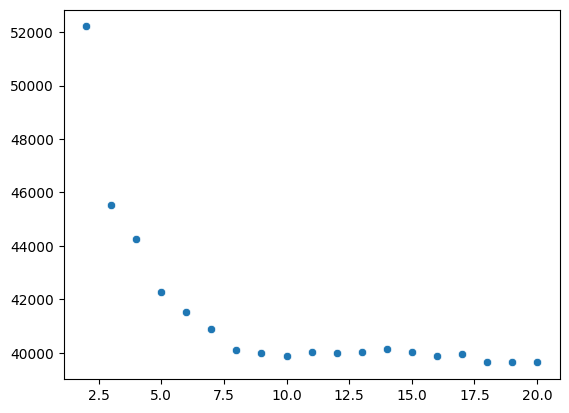

In [24]:
cross_vall = []
x_value = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for neigh_count in x_value:
  neigh = NearestNeighbors(n_neighbors=neigh_count , algorithm='ball_tree').fit(X)
  distances, indices = neigh.kneighbors(X)
  indices = indices[:,1:]

  predict = []
  for i in range(len(X)):
    predicted_values = indices[i]
    tmp = 0
    for j in range(len(predicted_values)):
      tmp += data_final.iloc[predicted_values[j]].salary
    predict.append(tmp / len(predicted_values))

  check_df = data.salary.to_frame()
  check_df['predicted'] = predict
  cross_vall.append((np.diff(check_df.values) ** 2).mean() ** .5)
sns.scatterplot(x = x_value, y = cross_vall)
print(min(cross_vall))

Лучшее решение удалось получить при числе соседей от 10 до 20. Прирост метрики между 10 и 20 соседями составляет всего 200 пунктов.

В качестве метрики был выбран RMSE. Среднеквадратичная ошибка показывает среднее расстояние между прогнозируемыми значениями из модели и фактическими значениями в наборе данных. Разделив ее на диапазон значений получим взвешенную оценку.

In [25]:
min(cross_vall)/(data.salary.max()-data.salary.min())

0.11324366627745378

Сравним полученную метрику с результатми других моделей. Более сложные модели показали примерно тот же результат или даже немного хуже. Для конкретно этого датасета KNN подходит лучше, так как требует меньше вычислений

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

data_final_no_scaler = data_final.select_dtypes(exclude=['object']).drop(columns = ['published_date'])
X = data_final_no_scaler.drop(columns = ['salary'])
y = data_final_no_scaler['salary'].to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.15)

reg = GradientBoostingRegressor(random_state=0)
lr = LinearRegression()
dtr = DecisionTreeRegressor()

models = [reg, lr, dtr]
rmse_value = []
models_name = ['GradientBoosting', 'LinearRegression', 'DecisionTreeRegressor']

for model in models:
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  tmp_df = y_test
  tmp_df['predict'] = predict
  rmse_value.append((np.diff(tmp_df.values) ** 2).mean() ** .5)

for i in range(len(models)):
  print(f'{models_name[i]}: RMSE = {rmse_value[i]}')

GradientBoosting: RMSE = 42647.617610691
LinearRegression: RMSE = 41863.591616812955
DecisionTreeRegressor: RMSE = 46856.930581409724


***Неудачные эксперименты***

Для извлечения эмбеддингов из текстовых параметров пробовал использовать следующую модель. На выходе получается вектор из 784 значений. На мой взгляд это слишком сильно увеличит количество параметров модели, а с учетом очень малого количества записей может привести к снижению точности

In [ ]:
#professional_skills, add_skills, other_certificates, other_info, workExperienceList, educationList, additionalEducationList
!pip install simpletransformers
from simpletransformers.language_representation import RepresentationModel
sentences = data['schedule_type'].to_list()
model = RepresentationModel(
        model_type="bert",
        model_name="bert-base-uncased",
        use_cuda=False
    )
sentence_vectors = model.encode_sentences(sentences, combine_strategy="mean")
print(sentence_vectors.shape)
sentence_vectors

Попробовал увеличть веса некоторым параметрам, которые исходя из логических соображений должны больше влиять на целевую переменную: образование, опыт работы, тип занятости. Метрика не изменилась

In [ ]:
koeff = 4
data_final_df['education'] = data_final_df['education']*koeff
data_final_df['position_name'] = data_final_df['position_name']*koeff
data_final_df['experience'] = data_final_df['experience']*koeff
data_final_df['busy_type'] = data_final_df['busy_type']*koeff
data_final_df['code_profession'] = data_final_df['code_profession']*koeff
data_final_df['code_professional_sphere'] = data_final_df['code_professional_sphere']*koeff